# 聚类
    聚类分析是非监督学习的很重要的领域。所谓非监督学习，就是数据是没有类别标记的，算法要从对原始数据的探索中提取出一定的规律。而聚类分析就是试图将数据集中的样本划分为若干个不相交的子集，每个子集称为一个“簇”。

## 一、KMeans算法
    KMEANS算法是输入聚类个数k，以及包含 n个数据对象的数据库，输出满足方差最小标准k个聚类的一种算法。k-means 算法接受输入量 k ；然后将n个数据对象划分为 k个聚类以便使得所获得的聚类满足：同一聚类中的对象相似度较高；而不同聚类中的对象相似度较小。

#### 工作原理 
    KMeans
    (1) 首先我们选择一些类/组，并随机初始化它们各自的中心点。中心点是与每个数据点向量长度相同的位置。这需要我们提前预知类的数量(即中心点的数量)。 
    (2) 计算每个数据点到中心点的距离，数据点距离哪个中心点最近就划分到哪一类中。 
    (3) 计算每一类中中心点作为新的中心点。 
    (4) 重复以上步骤，直到每一类中心在每次迭代后变化不大为止。也可以多次随机初始化中心点，然后选择运行结果最好的一个。 
    
    KMeans++
    (1)从数据集中任选一个节点作为第一个聚类中心
    (2)对数据集中的每个点ⅹ,计算x到所有已有聚类中心点的距离和D(X),基于D(X)采用线性概率（每个样本被选为下一个中心点的概率）选择出下一个聚类中心点距离较远的一个点成为新增的一个聚类中心点)
    (3)重复步骤2直到找到k个聚类中心点

### python实现所需要的函数库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### python库实现KMeans与KMeans++

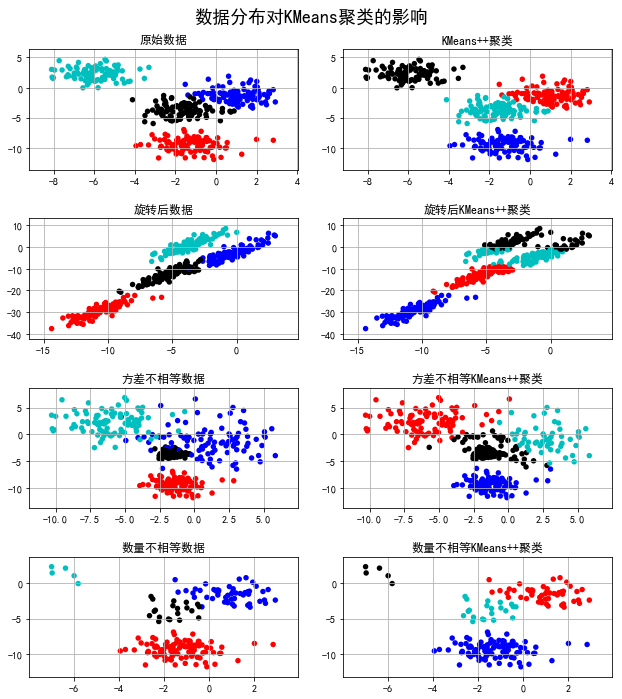

In [2]:

def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d



N = 400
centers = 4
data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
data2, y2 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,2.5,0.5,2), random_state=2)
data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))
y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)

cls = KMeans(n_clusters=centers, init='k-means++')
y_hat = cls.fit_predict(data)
y2_hat = cls.fit_predict(data2)
y3_hat = cls.fit_predict(data3)

m = np.array(((1, 1), (1, 3)))
data_r = data.dot(m)
y_r_hat = cls.fit_predict(data_r)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbmkyc'))

plt.figure(figsize=(9, 10), facecolor='w')
plt.subplot(421)
plt.title(u'原始数据')
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(422)
plt.title(u'KMeans++聚类')
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(423)
plt.title(u'旋转后数据')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(424)
plt.title(u'旋转后KMeans++聚类')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(425)
plt.title(u'方差不相等数据')
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(426)
plt.title(u'方差不相等KMeans++聚类')
plt.scatter(data2[:, 0], data2[:, 1], c=y2_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(427)
plt.title(u'数量不相等数据')
plt.scatter(data3[:, 0], data3[:, 1], s=30, c=y3, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(428)
plt.title(u'数量不相等KMeans++聚类')
plt.scatter(data3[:, 0], data3[:, 1], c=y3_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.tight_layout(2)
plt.suptitle(u'数据分布对KMeans聚类的影响', fontsize=18)
plt.subplots_adjust(top=0.92)
plt.show()

    KMeans算法的优势在于它的速度非常快，因为我们所做的只是计算点和簇中心之间的距离; 这已经是非常少的计算了！因此它具有线性的复杂度O(n)。

    但是K-Means算法也是有一些缺点。首先，你必须手动选择有多少簇。这是一个很大的弊端，理想情况下，我们是希望能使用一个聚类算法来帮助我们找出有多少簇，因为聚类算法的目的就是从数据中来获得一些有用信息。K-means算法的另一个缺点是从随机选择的簇中心点开始运行，这导致每一次运行该算法可能产生不同的聚类结果。因此，该算法结果可能具有不可重复，缺乏一致性等性质。而其他聚类算法的结果则会显得更一致一些。

    KMeans++由于依靠中心点和中心点之间的有序性进行中心点的划分，虽然避免了初始值敏感问题，可对于特别离散的数据，效果就不是很好了。

## KMeans代码

####  计算A点与B点距离的平方

In [3]:
def distance(vecA, vecB):
    '''计算vecA与vecB之间的欧式距离的平方
    input:  vecA(mat)A点坐标
            vecB(mat)B点坐标
    output: dist[0, 0](float)A点与B点距离的平方
    '''
    dist = (vecA - vecB) * (vecA - vecB).T
    return dist[0, 0]

####  初始化聚类中心

In [4]:
def randCent(data, k):
    '''随机初始化聚类中心
    input:  data(mat):训练数据
            k(int):类别个数
    output: centroids(mat):聚类中心
    '''
    n = np.shape(data)[1]  # 属性的个数
    centroids = np.mat(np.zeros((k, n)))  # 初始化k个聚类中心
    for j in range(n):  # 初始化聚类中心每一维的坐标
        minJ = np.min(data[:, j])
        rangeJ = np.max(data[:, j]) - minJ
        # 在最大值和最小值之间随机初始化
        centroids[:, j] = minJ * np.mat(np.ones((k , 1))) \
                        + np.random.rand(k, 1) * rangeJ
    return centroids

#### 求解聚类中心

In [5]:
def kmeans(data, k, centroids):
    '''根据KMeans算法求解聚类中心
    input:  data(mat):训练数据
            k(int):类别个数
            centroids(mat):随机初始化的聚类中心
    output: centroids(mat):训练完成的聚类中心
            subCenter(mat):每一个样本所属的类别
    '''
    m, n = np.shape(data) # m：样本的个数，n：特征的维度
    subCenter = np.mat(np.zeros((m, 2)))  # 初始化每一个样本所属的类别
    change = True  # 判断是否需要重新计算聚类中心
    while change == True:
        change = False  # 重置
        for i in range(m):
            minDist = np.inf  # 设置样本与聚类中心之间的最小的距离，初始值为正无穷
            minIndex = 0  # 所属的类别
            for j in range(k):
                # 计算i和每个聚类中心之间的距离
                dist = distance(data[i, ], centroids[j, ])
                if dist < minDist:
                    minDist = dist
                    minIndex = j
            # 判断是否需要改变
            if subCenter[i, 0] < minIndex:  # 需要改变
                change = True
                subCenter[i, ] = np.mat([minIndex, minDist])
        # 重新计算聚类中心
        for j in range(k):
            sum_all = np.mat(np.zeros((1, n)))
            r = 0  # 每个类别中的样本的个数
            for i in range(m):
                if subCenter[i, 0] == j:  # 计算第j个类别
                    sum_all += data[i, ]
                    r += 1
            for z in range(n):
                try:
                    centroids[j, z] = sum_all[0, z] / r
                except:
                    print (" r is zero") 
    #多维数组转成一维
    list1=[]
    for i in subCenter:
        list1.append(i[0,0])

    list2=np.array(list1)
    return list2

## KMeans++代码 

#### 点point和当前的聚类中心之间的最短距离

In [6]:
def nearest(point, cluster_centers):
    '''计算point和cluster_centers之间的最小距离
    input:  point(mat):当前的样本点
            cluster_centers(mat):当前已经初始化的聚类中心
    output: min_dist(float):点point和当前的聚类中心之间的最短距离
    '''
    min_dist = 1e100 # 设置一个较大的值作为初始化的最小的距离
    m = np.shape(cluster_centers)[0]  # 当前已经初始化的聚类中心的个数
    for i in range(m):
        # 计算point与每个聚类中心之间的距离
        d = distance(point, cluster_centers[i, ])
        # 选择最短距离
        if min_dist > d:
            min_dist = d
    return min_dist

#### 初始化聚类中心

In [7]:
from random import random
def get_centroids(points, k):
    '''KMeans++的初始化聚类中心的方法
    input:  points(mat):样本
            k(int):聚类中心的个数
    output: cluster_centers(mat):初始化后的聚类中心
    '''
    m, n = np.shape(points)
    cluster_centers = np.mat(np.zeros((k , n)))
    # 1、随机选择一个样本点为第一个聚类中心
    index = np.random.randint(0, m)
    cluster_centers[0, ] = np.copy(points[index, ])
    # 2、初始化一个距离的序列
    d = [0.0 for _ in range(m)]
 
    for i in range(1, k):
        sum_all = 0
        for j in range(m):
            # 3、对每一个样本找到最近的聚类中心点
            d[j] = nearest(points[j, ], cluster_centers[0:i, ])
            # 4、将所有的最短距离相加
            sum_all += d[j]
        # 5、取得sum_all之间的随机值
        sum_all *= random()
        # 6、获得距离最远的样本点作为聚类中心点
        for j, di in enumerate(d):
            sum_all -= di
            if sum_all > 0:
                continue
            cluster_centers[i] = np.copy(points[j, ])
            break
    return cluster_centers

##### 准备数据

In [8]:
data1, y = ds.make_blobs(400, n_features=2, centers=4, random_state=2)
data2, y2 = ds.make_blobs(400, n_features=2, centers=4, cluster_std=(1,2.5,0.5,2), random_state=2)
data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))

m = np.array(((1, 1), (1, 3)))
data1_r = data1.dot(m)

##### 计算聚类

In [9]:
# KMeans随机初始化k个聚类中心
k=4
centroids = randCent(data1, k)
centroids_r = randCent(data1_r, k)
centroids2 = randCent(data3, k)
centroids3 = randCent(data3, k)
# KMeans++的聚类中心初始化
centroidspp = get_centroids(data1, k)
centroidspp_r = get_centroids(data1_r, k)
centroidspp2 = get_centroids(data2, k)
centroidspp3 = get_centroids(data3, k)

In [10]:
#求解聚类中心
ys = kmeans(data1, k, centroids)
ys_r = kmeans(data1_r, k, centroids_r)
ys2 = kmeans(data2, k, centroids2)
ys3 = kmeans(data3, k, centroids3)
# 聚类计算
y_hat = kmeans(data1, k, centroidspp)
y_hat_r = kmeans(data1_r, k, centroidspp_r)
y2_hat = kmeans(data2, k, centroidspp2)
y3_hat = kmeans(data3, k, centroidspp3)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


##### 画图实现

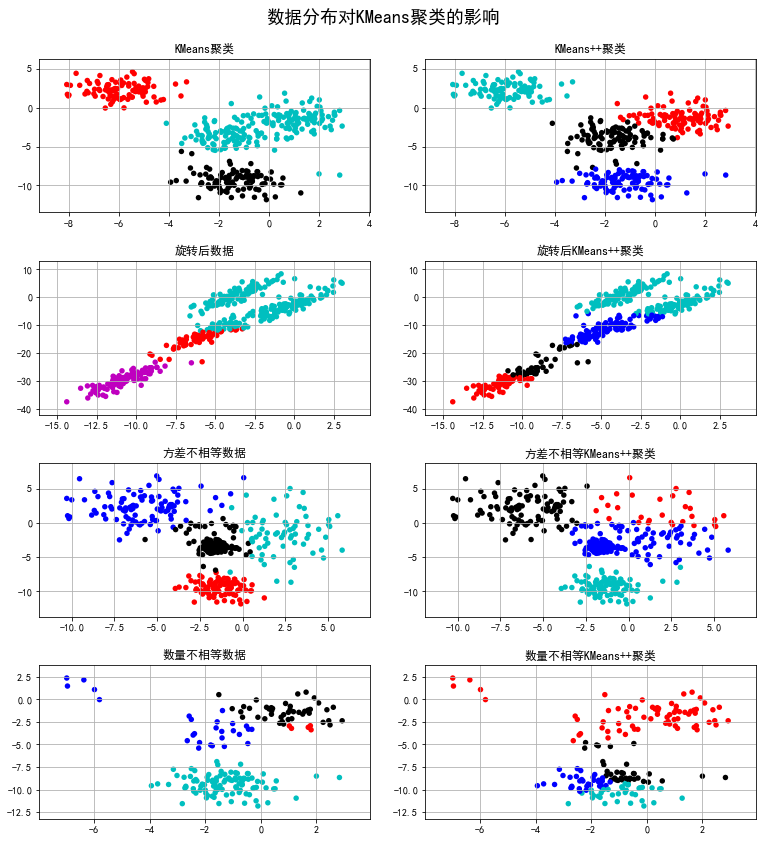

In [11]:
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d
#画图
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbmkyc'))

plt.figure(figsize=(11,12), facecolor='w')
plt.subplot(421)
plt.title(u'KMeans聚类')
plt.scatter(data1[:, 0], data1[:, 1], c=ys, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data1, axis=0)
x1_max, x2_max = np.max(data1, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(422)
plt.title(u'KMeans++聚类')
plt.scatter(data1[:, 0], data1[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)


plt.subplot(423)
plt.title(u'旋转后数据')
plt.scatter(data1_r[:, 0], data1_r[:, 1], c=ys_r, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data1_r, axis=0)
x1_max, x2_max = np.max(data1_r, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(424)
plt.title(u'旋转后KMeans++聚类')
plt.scatter(data1_r[:, 0], data1_r[:, 1], c=y_hat_r, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(425)
plt.title(u'方差不相等数据')
plt.scatter(data2[:, 0], data2[:, 1], c=ys2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(426)
plt.title(u'方差不相等KMeans++聚类')
plt.scatter(data2[:, 0], data2[:, 1], c=y2_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(427)
plt.title(u'数量不相等数据')
plt.scatter(data3[:, 0], data3[:, 1], s=30, c=ys3, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(428)
plt.title(u'数量不相等KMeans++聚类')
plt.scatter(data3[:, 0], data3[:, 1], c=y3_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.tight_layout(2)
plt.suptitle(u'数据分布对KMeans聚类的影响', fontsize=18)
plt.subplots_adjust(top=0.92)

plt.show()

##  二、DBSCAN 算法 
    DBSCAN(Density-Based Spatial Clustering of Applications with Noise)是一个比较有代表性的基于密度的聚类算法。与划分和层次聚类方法不同，它将簇定义为密度相连的点的最大集合，能够把具有足够高密度的区域划分为簇，并可在噪声的空间数据库中发现任意形状的聚类。

### 概念

####   Ε邻域：给定对象半径为Ε内的区域称为该对象的Ε邻域；
#### 核心对象：如果给定对象Ε邻域内的样本点数大于等于MinPts，则称该对象为核心对象；
####   直接密度可达：对于样本集合D，如果样本点q在p的Ε邻域内，并且p为核心对象，那么对象q从对象p直接密度可达。
####  密度可达：对于样本集合D，给定一串样本点p1,p2….pn，p= p1,q= pn,假如对象pi从pi-1直接密度可达，那么对象q从对象p密度可达。
####    密度相连： 存在样本集合D中的一点o，如果对象o到对象p和对象q都是密度可达的，那么p和q密度相联。可以发现，密度可达是直接密度
#####                      可达的传递闭包，并且这种关系是非对称的。密度相连是对称关系。DBSCAN目的是找到密度  相连对象的最大集合。
####  Eg: 假设半径Ε=3，MinPts=3，点p的E邻域中有点{m,p,p1,p2,o}, 点m的E邻域中有点{m,q,p,m1,m2},点q的E邻域中有点{q,m},点o的E
####  邻域中有点{o,p,s},点s的E邻域中有点{o,s,s1}.
####  那么核心对象有p,m,o,s(q不是核心对象，因为它对应的E邻域中点数量等于2，小于MinPts=3)；
#### 点m从点p直接密度可达，因为m在p的E邻域内，并且p为核心对象；
#### 点q从点p密度可达，因为点q从点m直接密度可达，并且点m从点p直接密度可达；
#### 点q到点s密度相连，因为点q从点p密度可达，并且s从点p密度可达。

###  工作原理
    DBScan需要二个参数： 扫描半径 (eps)和最小包含点数(minPts)。 任选一个未被访问(unvisited)的点开始，找出与其距离在eps之内(包括eps)的所有附近点。
    如果 附近点的数量 ≥ minPts，则当前点与其附近点形成一个簇，并且出发点被标记为已访问(visited)。 然后递归，以相同的方法处理该簇内所有未被标记为已访问(visited)的点，从而对簇进行扩展。
    如果 附近点的数量 < minPts，则该点暂时被标记作为噪声点。
    如果簇充分地被扩展，即簇内的所有点被标记为已访问，然后用同样的算法去处理未被访问的点。

### python库实现DBSCAN

[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3  4] 聚类簇的个数为： 5
[-1  0] 聚类簇的个数为： 1
[-1  0  1] 聚类簇的个数为： 2
[-1  0  1  2  3] 聚类簇的个数为： 4


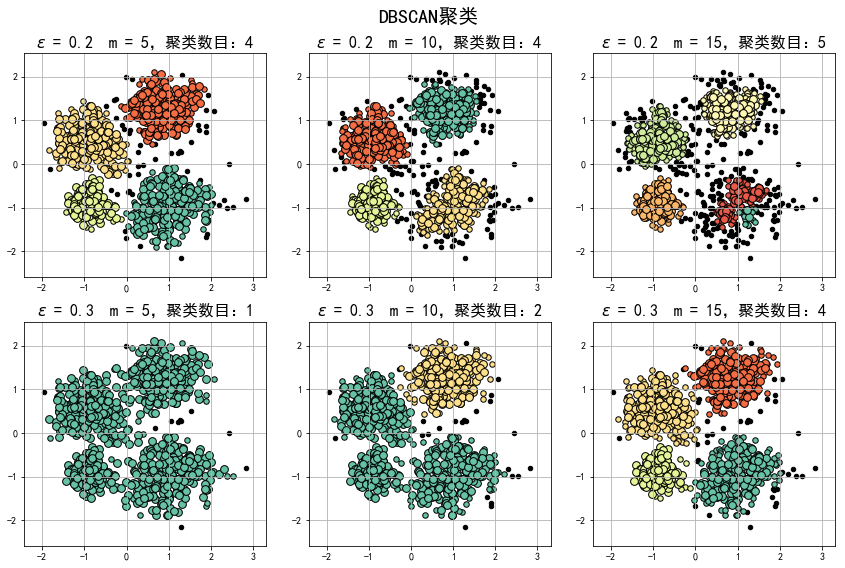

In [12]:
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
data = StandardScaler().fit_transform(data)
# 数据1的参数：(epsilon, min_sample)
params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))


matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8), facecolor='w')
plt.suptitle(u'DBSCAN聚类', fontsize=20)

for i in range(6):
    eps, min_samples = params[i]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    y_hat = model.labels_

    core_indices = np.zeros_like(y_hat, dtype=bool)
    core_indices[model.core_sample_indices_] = True

    y_unique = np.unique(y_hat)
    n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
    print (y_unique, '聚类簇的个数为：', n_clusters)

    plt.subplot(2, 3, i+1)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
    for k, clr in zip(y_unique, clrs):
        cur = (y_hat == k)
        if k == -1:
            plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
            continue
        plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
        plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(True)
    plt.title(r'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


## DBSCAN代码实现

##### 计算半径

In [13]:
import math

def epsilon(data, MinPts):
    '''计算半径
    input:  data(mat):训练数据
            MinPts(int):半径内的数据点的个数
    output: eps(float):半径
    '''
    m, n = np.shape(data)
    xMax = np.max(data, 0)
    xMin = np.min(data, 0)
    eps = ((np.prod(xMax - xMin) * MinPts * math.gamma(0.5 * n + 1)) / (m * math.sqrt(math.pi ** n))) ** (1.0 / n)
    return eps

##### 计算两点之间的欧式距离

In [14]:
def distance(data):
    m, n = np.shape(data)
    dis = np.mat(np.zeros((m, m)))
    for i in range(m):
        for j in range(i, m):
            # 计算i和j之间的欧式距离
            tmp = 0
            for k in range(n):
                tmp += (data[i, k] - data[j, k]) * (data[i, k] - data[j, k])
            dis[i, j] = np.sqrt(tmp)
            dis[j, i] = dis[i, j]
    return dis

##### DBSCAN算法函数

In [15]:
# 找到半径eps内的所有点
def find_eps(distance_D, eps):
    ind = []
    n = np.shape(distance_D)[1]
    for j in range(n):
        if distance_D[0, j] <= eps:
            ind.append(j)
    return ind

def dbscan(data, eps, MinPts):
    m = np.shape(data)[0]
    # 区分核心点1，边界点0和噪音点-1
    types = np.mat(np.zeros((1, m)))
    sub_class = np.mat(np.zeros((1, m)))
    # 用于判断该点是否处理过，0表示未处理过
    dealed = np.mat(np.zeros((m, 1)))
    # 计算每个数据点之间的距离
    dis = distance(data)
    # 用于标记类别
    number = 1
    
    # 对每一个点进行处理
    for i in range(m):
        # 找到未处理的点
        if dealed[i, 0] == 0:
            # 找到第i个点到其他所有点的距离
            D = dis[i, ]
            # 找到半径eps内的所有点
            ind = find_eps(D, eps)
            # 区分点的类型
            # 边界点
            if len(ind) > 1 and len(ind) < MinPts + 1:
                types[0, i] = 0
                sub_class[0, i] = 0
            # 噪音点
            if len(ind) == 1:
                types[0, i] = -1
                sub_class[0, i] = -1
                dealed[i, 0] = 1
            # 核心点
            if len(ind) >= MinPts + 1:
                types[0, i] = 1
                for x in ind:
                    sub_class[0, x] = number
                # 判断核心点是否密度可达
                while len(ind) > 0:
                    dealed[ind[0], 0] = 1
                    D = dis[ind[0], ]
                    tmp = ind[0]
                    del ind[0]
                    ind_1 = find_eps(D, eps)
                    
                    if len(ind_1) > 1:  # 处理非噪音点
                        for x1 in ind_1:
                            sub_class[0, x1] = number
                        if len(ind_1) >= MinPts + 1:
                            types[0, tmp] = 1
                        else:
                            types[0, tmp] = 0
                            
                        for j in range(len(ind_1)):
                            if dealed[ind_1[j], 0] == 0:
                                dealed[ind_1[j], 0] = 1
                                ind.append(ind_1[j])
                                sub_class[0, ind_1[j]] = number
                number += 1
    
    # 最后处理所有未分类的点为噪音点
    ind_2 = ((sub_class == 0).nonzero())[1]
    for x in ind_2:
        sub_class[0, x] = -1
        types[0, x] = -1
    return types, sub_class

##### 数据准备

In [16]:
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
data = StandardScaler().fit_transform(data)
# 数据1的参数：(epsilon, min_sample)，min_sample定义半径内的最少的数据点的个数
params = (3, 5, 6, 7, 10, 15)

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 聚类簇的个数为： 14
[-1  1  2  3  4] 聚类簇的个数为： 4
[-1  1  2  3] 聚类簇的个数为： 3
[-1  1  2] 聚类簇的个数为： 2
[-1  1] 聚类簇的个数为： 1
[-1  1] 聚类簇的个数为： 1


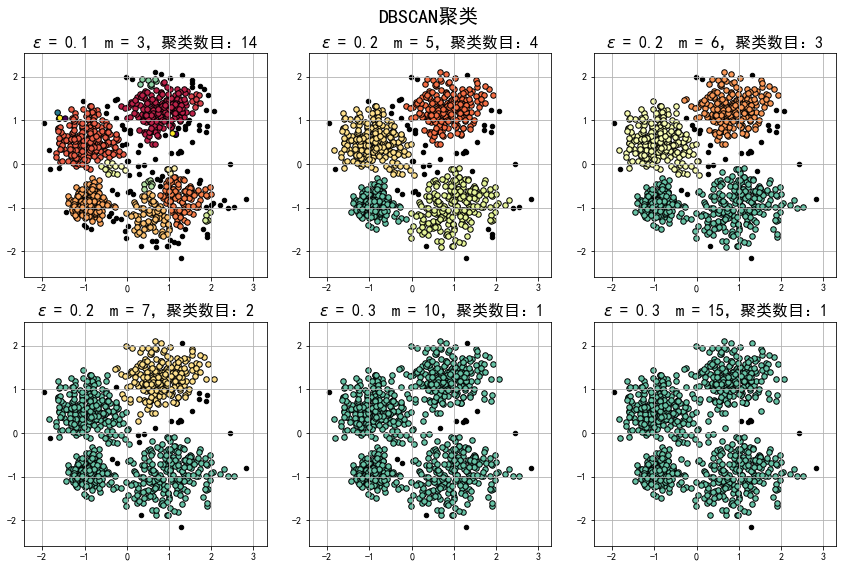

In [17]:
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d



matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8), facecolor='w')
plt.suptitle(u'DBSCAN聚类', fontsize=20)

for i in range(6):
    min_samples = params[i]
    # 计算半径
    eps = epsilon(data, min_samples)
    # 利用DBSCAN算法进行训练
    types, sub_class = dbscan(data, eps, min_samples)
    
    #多维数组转成一维
    list1=[]
    list2=[]
    for j in range(N):
        list1.append(int(sub_class[0,j]))
        list2.append(int(types[0,j]))
    types=np.array(list2)
    y_hat=np.array(list1)
                     
    core_indices = np.zeros_like(y_hat, dtype=bool)
    

    y_unique = np.unique(y_hat)
    n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
    print (y_unique, '聚类簇的个数为：', n_clusters)

    plt.subplot(2, 3, i+1)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
    for k, clr in zip(y_unique, clrs):
        cur = (y_hat == k)
        if k == -1:
            plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
            continue
        plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
        plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(True)
    plt.title(r'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## 总结

#### K-means算法优点：
    （1）、是解决聚类问题的一种经典算法，简单、快速
    （2）、对处理大数据集，该算法保持可伸缩性和高效性
    （3）、当簇接近高斯分布时，它的效果较好。
#### K-means算法缺点：
    (1)、在簇的平均值可被定义的情况下才能使用，可能不适用于某些应用；
    (2)、在 K-means 算法中 K 是事先给定的，这个 K 值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适；
    (3)、在 K-means 算法中，首先需要根据初始聚类中心来确定一个初始划分，然后对初始划分进行优化。这个初始聚类中心的选择对聚类结果有较大的影响，一旦初始值选择的不好，可能无法得到有效的聚类结果；
    (4)、该算法需要不断地进行样本分类调整，不断地计算调整后的新的聚类中心，因此当数据量非常大时，算法的时间开销是非常大的；
    (5)、若簇中含有异常点，将导致均值偏离严重（即:对噪声和孤立点数据敏感）；
    (6)、不适用于发现非凸形状的簇或者大小差别很大的簇。

#### DBSCAN算法的优点   
    1. 与K-means方法相比，DBSCAN不需要事先知道要形成的簇类的数量。
    2. 与K-means方法相比，DBSCAN可以发现任意形状的簇类。
    3. 同时，DBSCAN能够识别出噪声点。
    4.DBSCAN对于数据库中样本的顺序不敏感，即Pattern的输入顺序对结果的影响不大。但是，对于处于簇类之间边界样本，可能会根据哪个簇类优先被探测到而其归属有所摆动。
#### DBSCAN算法的缺点    
    1. DBScan不能很好反映高维数据。
    2. DBScan不能很好反映数据集以变化的密度。
    3.如果样本集的密度不均匀、聚类间距差相差很大时，聚类质量较差。    

##### 总的来说，不同的数据集，选择不同的算法，选对合适的算法很重要，合适的算法效果相对较佳，还要综合考虑各项指标，比如时间复杂度，空间复杂度等。